# Note:
processing images i.e., loading images from disk and resizing using gpu will take a lot of time and thus use cpu for preprocessing images and save it using h5py and then load and train model using gpu.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
my_path = '/content/gdrive/My Drive/Data-Science-Google-Colab/'

In [3]:
cd $my_path

/content/gdrive/My Drive/Data-Science-Google-Colab


In [4]:
cd age-detection

/content/gdrive/My Drive/Data-Science-Google-Colab/age-detection


In [5]:
# from google.colab import files
# files.upload()

In [6]:
ls

age_detection_1.h5    age_detection_images_array.h5  test/     Train/
age_detection_1.json  age_detection_test_images.h5   Test/     train.csv
age_detection_2.h5    age_pred_sub2.csv              test.csv
age_detection_2.json  sub1.csv                       train/


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [8]:
train_images_dir = 'Train/'
test_images_dir = 'Test/'

In [9]:
train_df_original = pd.read_csv('train.csv')
test_df_original = pd.read_csv('test.csv')

train_df = train_df_original.copy()
test_df = test_df_original.copy()

In [10]:
train_df

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
...,...,...
19901,2482.jpg,MIDDLE
19902,20085.jpg,YOUNG
19903,19663.jpg,MIDDLE
19904,10132.jpg,MIDDLE


In [11]:
train_df.Class.value_counts()

MIDDLE    10804
YOUNG      6706
OLD        2396
Name: Class, dtype: int64

In [12]:
train_df = pd.get_dummies(data=train_df, columns=['Class'])

In [16]:
train_df.head()

,ID,Class_MIDDLE,Class_OLD,Class_YOUNG
0,377.jpg,1,0,0
1,17814.jpg,0,0,1
2,21283.jpg,1,0,0
3,16496.jpg,0,0,1
4,4487.jpg,1,0,0


In [14]:
def process_image(img):
    dim = (64, 64)
    # reading with plt is a bit faster
    img = plt.imread(img)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
    if img.shape!=(64, 64,3):
      img = np.stack([img]*3, axis=-1)
    return img

(57, 54, 3)


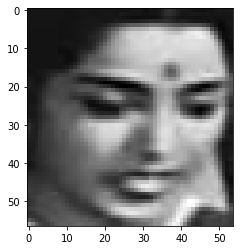

In [17]:
file = '16496.jpg'
img = plt.imread(train_images_dir+file)
# img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_LINEAR)
plt.imshow(img)
print(img.shape)

In [ ]:
# X = []
# # y = []

# for i,img in enumerate(train_df.ID):
#   try:
#     image = process_image(train_images_dir+img)
#   except:
#     continue

#   X.append(image)
#   # y.append(train_df.Class[i])


In [ ]:
# X = np.array(X)
# # y = np.array(y)

In [ ]:
# len(X), len(y)

(19906, 19906)

In [ ]:
# import h5py

# h5f = h5py.File('age_detection_images_array.h5', 'w')
# h5f.create_dataset('dataset_1', data=X)
# h5f.close()

# # or

# with hfpy.File('age_detection_images_array.h5', 'w') as f:
#   f.create_dataset('dataset_1', data=X)


In [ ]:
import h5py
f = h5py.File('age_detection_images_array.h5','r')
X = f['dataset_1'][:]
f.close()

In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [ ]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    
    return model

In [ ]:
input_shape = (64, 64, 3)
model = createModel()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)       

In [ ]:
# from keras.optimizers import Adam
# opt = Adam(lr=0.1)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   rotation_range=20)
# test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow(X,train_df[['Class_MIDDLE','Class_OLD','Class_YOUNG']], batch_size=32)

In [ ]:
# # Part 2 - Fitting the CNN to the images

model.fit_generator(training_set,
                         steps_per_epoch = 650,
                         epochs = 100)
                         

Epoch 1/100
 36/650 [>.............................] - ETA: 7:42 - loss: 0.9924 - accuracy: 0.5165

In [ ]:
model_json = model.to_json()
with open("age_detection_2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("age_detection_2.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
train_df.head(10)

,ID,Class_MIDDLE,Class_OLD,Class_YOUNG
0,377.jpg,1,0,0
1,17814.jpg,0,0,1
2,21283.jpg,1,0,0
3,16496.jpg,0,0,1
4,4487.jpg,1,0,0
5,6283.jpg,1,0,0
6,23495.jpg,0,0,1
7,7100.jpg,0,0,1
8,6028.jpg,0,0,1
9,22617.jpg,0,1,0


[[0. 0. 1.]]


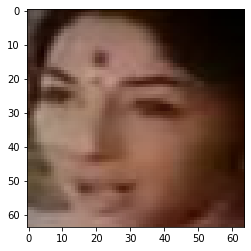

In [ ]:
i=7
p = model.predict(np.array([X[i]]))
print(p)
plt.imshow(X[i])

In [ ]:
!ls

age_detection_1.h5    age_detection_images_array.h5  test      Train
age_detection_1.json  age_detection_test_images.h5   Test      train.csv
age_detection_2.h5    age_pred_sub2.csv		     test.csv
age_detection_2.json  sub1.csv			     train


In [ ]:
f = h5py.File('age_detection_test_images.h5','r')
test_X = f['test_dataset'][:]
f.close()

In [ ]:
test_X = test_X/255

In [ ]:
preds = model.predict(test_X)

In [ ]:
classes = ['MIDDLE', 'OLD', 'YOUNG']
predictions = list(map(lambda x: classes[np.argmax(x)], preds))

OLD


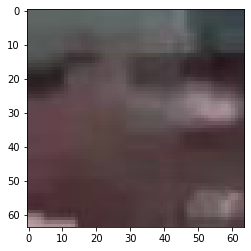

In [ ]:
i=4
plt.imshow(test_X[i])
print(predictions[i])

In [ ]:
pd.DataFrame({'ID':test_df.ID, 'Class':predictions}).to_csv('age_pred_sub2.csv', index=False)

In [ ]:
from google.colab import files
files.download('age_pred_sub2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ls

age_detection_1.h5    age_detection_images_array.h5  test/     Train/
age_detection_1.json  age_detection_test_images.h5   Test/     train.csv
age_detection_2.h5    age_pred_sub2.csv              test.csv
age_detection_2.json  sub1.csv                       train/


In [ ]:
from keras.models import model_from_json

json_file = open('age_detection_2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("age_detection_2.h5")


Using TensorFlow backend.


In [ ]:
# from keras.optimizers import Adam
# opt = Adam(lr=0.1)
loaded_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
f = h5py.File('age_detection_test_images.h5','r')
test_X = f['test_dataset'][:]
f.close()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   rotation_range=20)
# test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow(X,train_df[['Class_MIDDLE','Class_OLD','Class_YOUNG']], batch_size=32)

In [ ]:
from keras import backend as k

k.set_value(loaded_model.optimizer.lr, 0.0001)

In [ ]:
# # Part 2 - Fitting the CNN to the images

loaded_model.fit_generator(training_set,
                         steps_per_epoch = 650,
                         epochs = 100)
                         

Epoch 1/100
650/650 [==============================] - 38s 58ms/step - loss: 0.2682 - accuracy: 0.8919
Epoch 2/100
650/650 [==============================] - 37s 58ms/step - loss: 0.2721 - accuracy: 0.8906
Epoch 3/100
650/650 [==============================] - 38s 58ms/step - loss: 0.2726 - accuracy: 0.8908
Epoch 4/100
650/650 [==============================] - 37s 58ms/step - loss: 0.2723 - accuracy: 0.8925
Epoch 5/100
650/650 [==============================] - 37s 58ms/step - loss: 0.2763 - accuracy: 0.8902
Epoch 6/100
650/650 [==============================] - 37s 58ms/step - loss: 0.2709 - accuracy: 0.8930
Epoch 7/100
650/650 [==============================] - 37s 58ms/step - loss: 0.2726 - accuracy: 0.8910
Epoch 8/100
650/650 [==============================] - 38s 59ms/step - loss: 0.2757 - accuracy: 0.8887
Epoch 9/100
650/650 [==============================] - 38s 59ms/step - loss: 0.2746 - accuracy: 0.8922
Epoch 10/100
650/650 [==============================] - 38s 59ms/step - l

KeyboardInterrupt: ignored

In [ ]:
test_X = test_X/255
preds = loaded_model.predict(test_X)
classes = ['MIDDLE', 'OLD', 'YOUNG']
predictions = list(map(lambda x: classes[np.argmax(x)], preds))
pd.DataFrame({'ID':test_df.ID, 'Class':predictions}).to_csv('age_pred_sub2.csv', index=False)

In [ ]:
from google.colab import files
files.download('age_pred_sub2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>